# Section 8 - Pipeline, Grid Search, Random Forests
This section will get you to practice:
1. classification algorithms you recently learned in lectures, such as, decision trees, random forests. 
2. parameter optimization via pipeline and grid search.

## 0 Data
### Load
The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is available from sklearn.datasets.

- A summary of information is provided here:
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset
- Dataset can also be downloaded from: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. 

**Task:**

- Run the cell below to load the breast cancer data 
- Features `X` consisting of 30 features 
- target `y`: 0 (benign/harmless/good) and 1 (malignant/harmful/bad). 

In [43]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset as panda data frame
# X stores sample features and y stores labels [0 or 1]
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
display(X)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [44]:
print('num of 1s (malignant):  ', np.count_nonzero(y), 'of', len(y))

num of 1s (malignant):   357 of 569


### 0.2 Split
**Discuss:**
- What does stratified shuffle split do? What inputs does it take and what outputs does it give to the user?

    **Ans:** 
    - input: two arguments n_splits and test_size
    - output: outputs (n_splits) number of "folds" with the given test_size

**Task:**
- Split the data into training and test sets using [`sklearn.model_selection.StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html). 
    - Set n_split=1, test_size=1/5, random_state=0.
- Verify that the stratified split was performed correctly by printing relevant sizes of arrays.

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
# use random state to ensure reproducibility (each time we execute this data we get same set
# of training and test data
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/5, random_state=0) # TODO
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]     # TODO
    X_test , y_test  = X.iloc[test_idx] , y.iloc[test_idx]      # TODO

# Verify correctness of split.
print('num of 1 (malignant)')
print("Training set:", (y_train==1).sum(), "out of", y_train.shape[0])
print("Test set    :", (y_test==1).sum(), "out of", y_test.shape[0])

num of 1 (malignant)
Training set: 285 out of 455
Test set    : 72 out of 114


## 1 Decision Tree GRidSearchCV
This step-by-step example is shown before implementing for all others later. The goal is to understand full how gridsearch works.

### Step 1: Prepare Decision Tree Classifier and Grid Search
**Task:**
- Create a sklearn Decision Tree classifier `dt_clf`
- define `dt_grid`, a dictionary of parameters with the possible values they are allowed to take in the grid search
    - criterion: gini or entropy
    - max_depth: 2, 3, 4
    - min_samples_split: 5, 10, 15?
    - **Discuss:** what do each of these parameters mean?

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# parameters and their possible values
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [5, 10, 15]
}

### Step 2: Find best parameters using GridSearchCV
Perform grid search using cross-validation in sklearn.

**Task:**
- Define `grid_search`, a GridSearchCV object
    - input classifier clf and param_grid
    - set cv=5, for 5 fold cross validation. Note: these folds are different
- fit grid_search to the training data

In [47]:
from sklearn.model_selection import GridSearchCV

dt_search = GridSearchCV(dt_clf, dt_grid, cv=5) # TODO
dt_search.fit(X_train, y_train)                 # TODO

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_split': [5, 10, 15]})

**Task:**
- extract best parameters (best_params_) and print it
- extract best model (best_estimator_) and score its accuracy on test data

In [48]:
best_params = dt_search.best_params_        # TODO
print("Best Parameters:", best_params)

best_estimator = dt_search.best_estimator_  # TODO
accuracy = best_estimator.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}
Test Set Accuracy: 0.9122807017543859


### Step 3: Visualize best Decision Tree Classifier
**Task:**
- Visualize your tree result using sklearn.tree plot_tree() function.

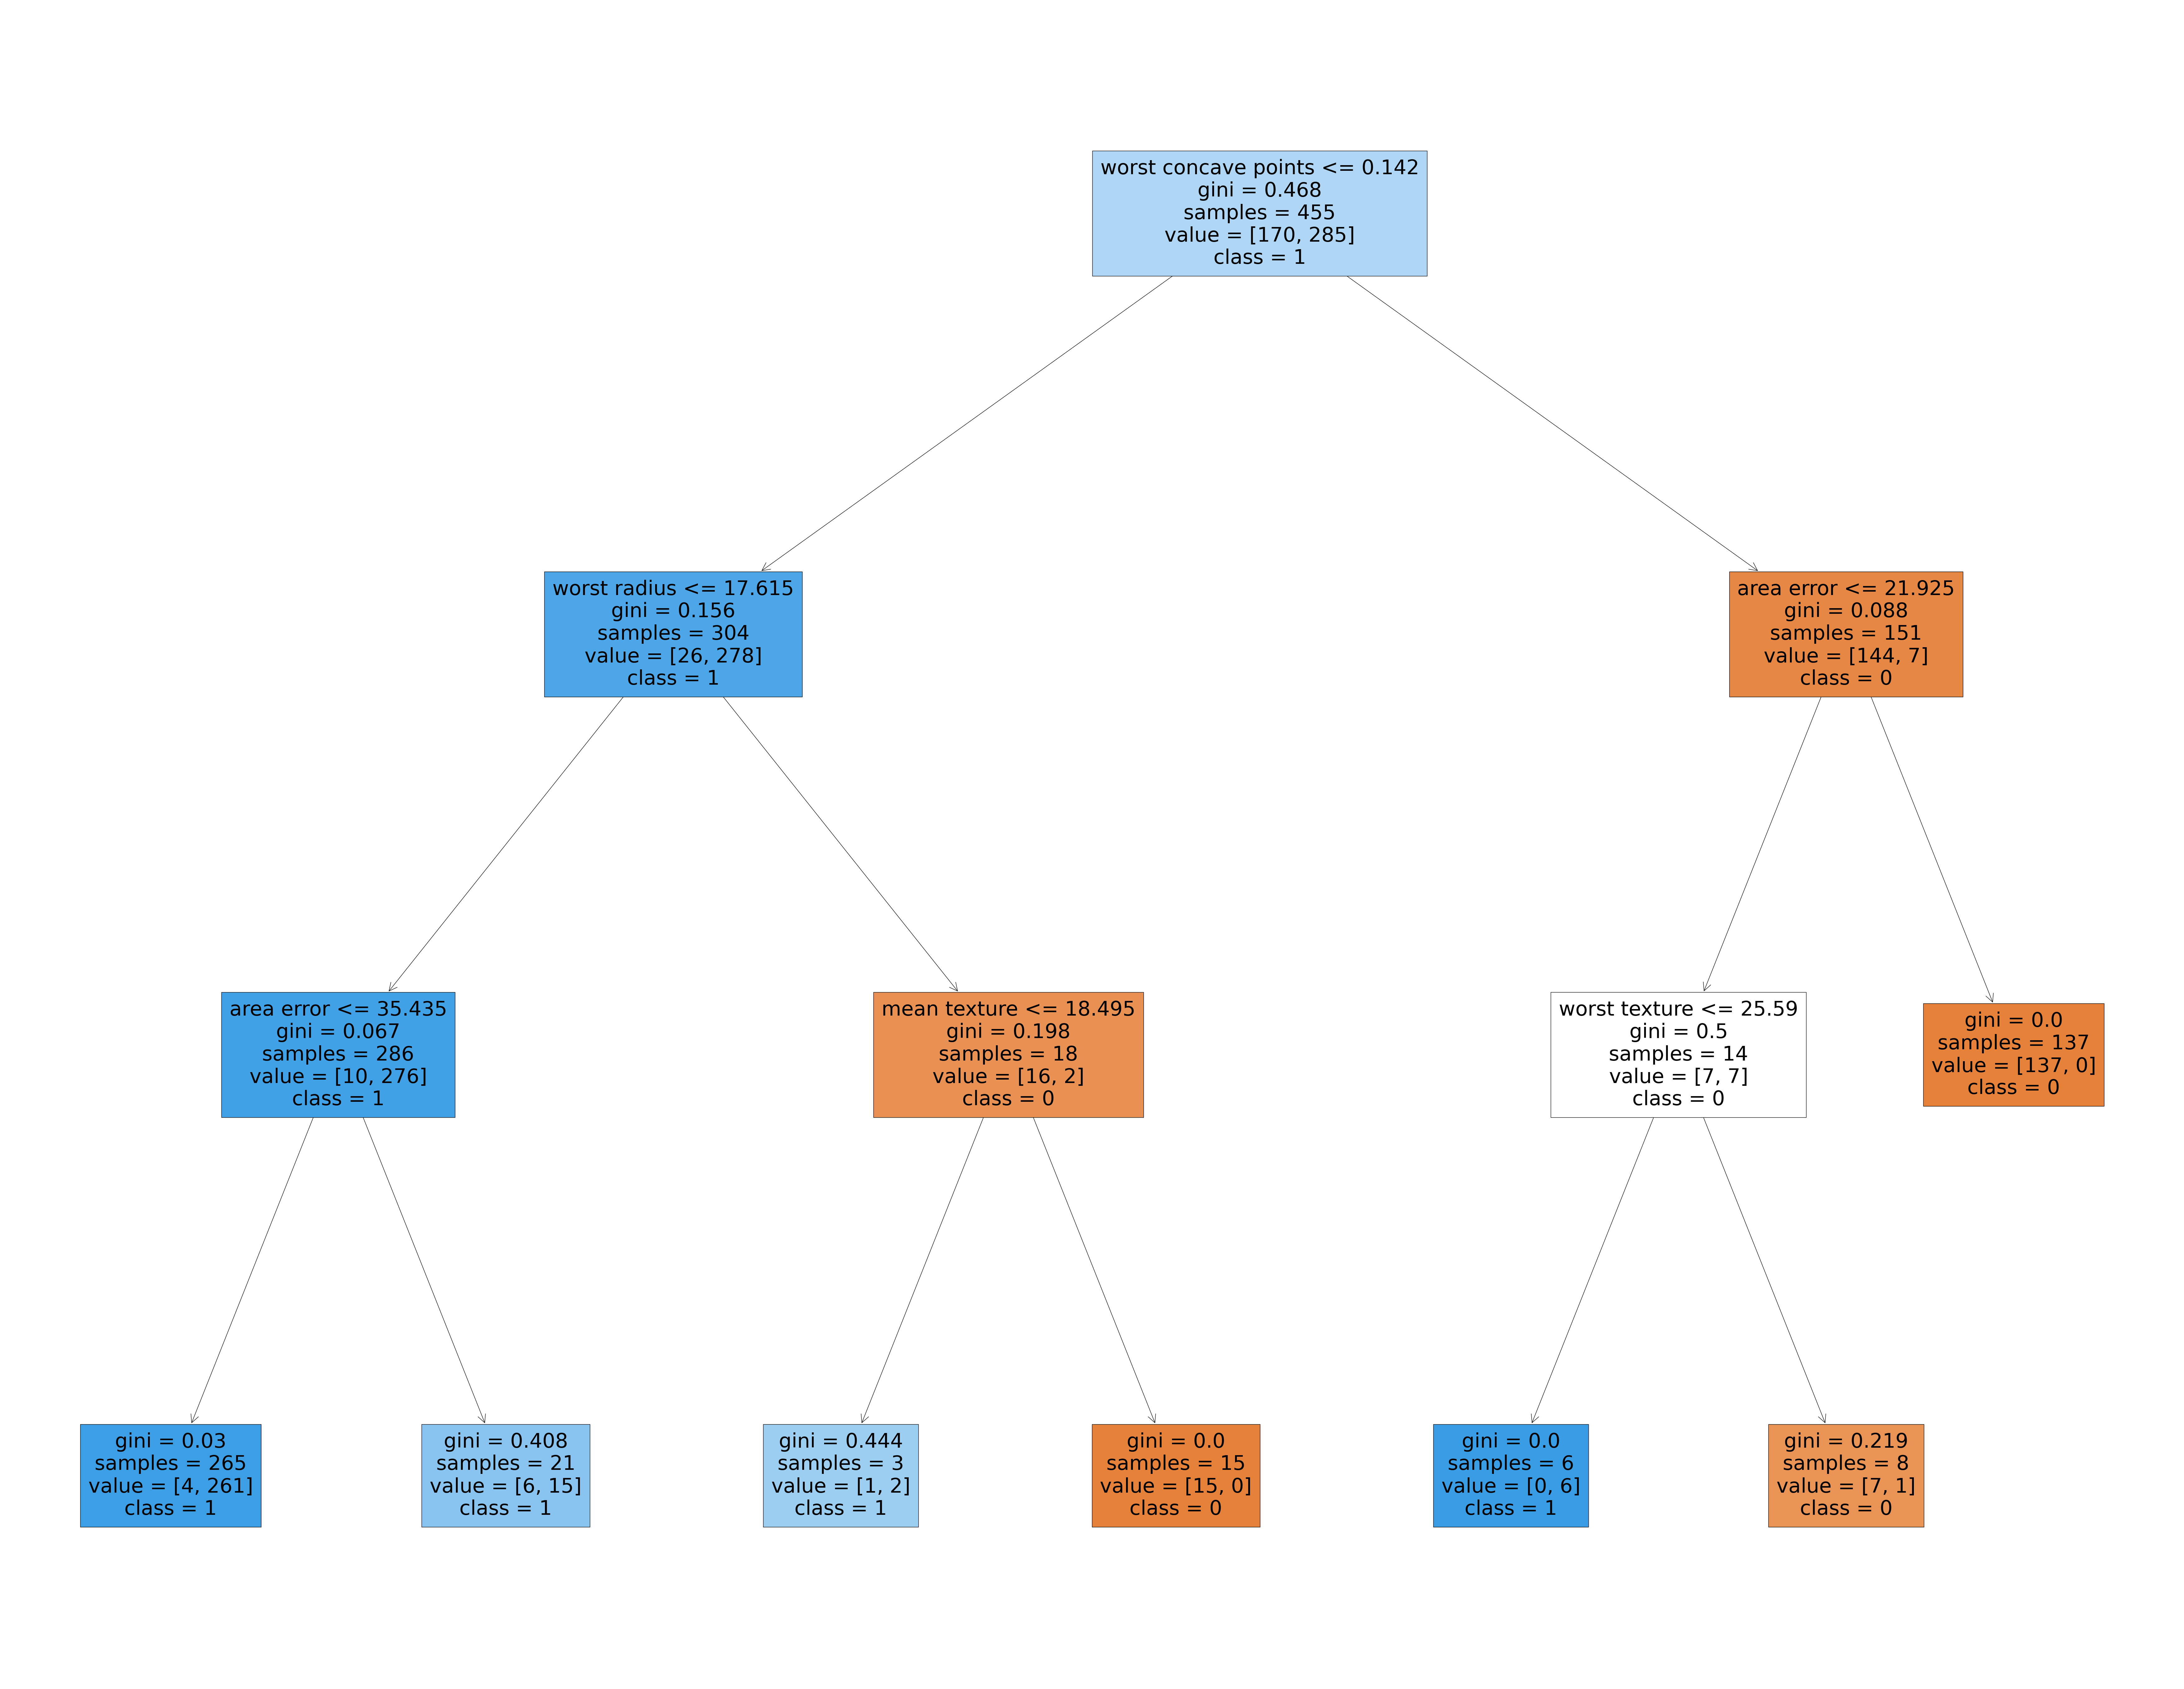

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(90,70))
plot_tree(best_estimator, feature_names = list(X.columns), class_names=['0','1'], filled=True)
plt.show()

## 2 More Classifiers with GridSearchCV
### 2.1 Train models
We have covered the following classifiers in lecture:
- kNN
- LDA, QDA, GNB
- decision trees, random forests

The next exercise is to code up a pipeline that will compare all models at the same time.

**Task:**
1. Write the function `best_model` which find the best model, given a pipeline/classifier and parameter grid.
2. Use [`sklearn.pipeline.Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to find the best classifiers, while allowing a range of parameters to be considered for each classifier. 
    - "best" means the highest accuracy on cross validation.
    - You should fit the models to the training data.
    - Parameters of each classifier are set with the ‘__’ convention. Look at lecture notes or sklearn documentation for examples.
    - Where necessary, seek optimal hyperparameters using `best_model` you wrote above. 

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Return best classifier from grid search. CV = cross-validation
def best_model(pipe, grid, X_train, y_train):
    '''
    pipe: pipeline object or sklearn classifier object
    grid: dictionary of parameters to explore. if using pipeline, 
            ensure the double underscore __ convention is used
    X_train, y_train: the training data
    '''
    search = GridSearchCV(pipe, grid, cv=5)
    search.fit(X_train, y_train)
    return search.best_estimator_

#### knn
- use standard scaler in pipeline
- explore n_neighbors: [4, 16, 32]


In [51]:
# k-NN with pipeline and standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('ss', StandardScaler()), 
    ('knn', KNeighborsClassifier())
    ])
knn_grid = {
    'knn__n_neighbors': [4, 16, 32]
    }
knn_model = best_model(pipe_knn, knn_grid, X_train, y_train)

#### GNB, LDA, QDA
- No pipeline needed
    - **Discuss:** why Why doesn't it make that much sense to have a pipeline?
- default parameters for all

In [52]:
# GNB, LDA, QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

#### Decision Tree
- use pca in pipeline
    - n_components: [10, 20, 30]
- explore 
    - criterion: ['gini', 'entropy']
    - max_depth: [2, 3, 4,5]
    - min_samples_split: [5, 10, 15]

In [53]:
# Decision Tree with pipeline
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ('pca', decomposition.PCA()), 
    ('dt', DecisionTreeClassifier())
    ])
dt_grid = {
    'pca__n_components':[10, 20, 30],
    'dt__criterion': ['gini', 'entropy'], 
    'dt__max_depth': [2, 3, 4,5], 
    'dt__min_samples_split': [5, 10, 15]
    }
dt_model = best_model(pipe_dt, dt_grid, X_train, y_train)


#### Random Forest
- use pca in pipeline
    - n_components: [10, 20, 30]
- explore
    - n_estimators = [10, 50, 200]

In [54]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition

pipe_rf = Pipeline([
    ('pca', decomposition.PCA()), 
    ('rf', RandomForestClassifier())
    ])
rf_grid = {
    'pca__n_components':[10, 20, 30],
    'rf__n_estimators': [10, 50, 200]
    }
rf_model = best_model(pipe_rf, rf_grid, X_train, y_train)

### 2.2 Compare models
**Task:**
- Which model has the best accuracy on test data? Print it.
- What were the hyperparameters used in the best model's training? Can you recognize which are the hyperparameters?

In [55]:
from sklearn.metrics import accuracy_score as acc
models = [knn_model, gnb_model, lda_model, qda_model, dt_model, rf_model]

# Best model.
model_accuracies = [acc(y_test, mod.predict(X_test)) for mod in models]
print('models     :', '[knn_model, gnb_model, lda_model, qda_model, dt_model, rf_model]')
print('accuracies :', np.round(model_accuracies, 4))

best_model_idx = np.argmax(model_accuracies)
print('\n*best model:', best_model_idx+1)
print(models[best_model_idx])

models     : [knn_model, gnb_model, lda_model, qda_model, dt_model, rf_model]
accuracies : [0.9649 0.9211 0.9561 0.9474 0.9211 0.9298]

*best model: 1
Pipeline(steps=[('ss', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])


### 2.3 Remove standard scaler/PCA and rerun the cells above
- Standard scaler rescales the data in each feature/dimension to have variance 1. 
- PCA reduces the dimensionality of the data.

These are preprocessing steps in the data, though not necessarily the "right" thing to do. Try removing the standard scaler/PCA and see what effect it has on the prediction accuracy.
- you can do this by simply commenting out relevant lines of code

**Disuss:** What is the best model now? 